## Text classification on LeMonde2003 Dataset

In this notebook, we 
apply classification algorithms to newspaper articles published in 2003 in *Le Monde*. 

The data are in data/LeMonde2003_9classes.csv.gz

These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `data/LeMonde2003_9classes.csv` containing the articles using pandas [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). How many articles do you have ? 
> * Plot the frequency histogram of the categories using seaborn [countplot](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`
> * Display the text of some of the article with the corresponding class using pandas [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
> * Using the [WordCloud library](https://amueller.github.io/word_cloud/index.html), display a word cloud for the most frequent classes. You can remove the stop words using the `stopwords` option, using the list of stop words in French in `data/stop_word_fr.txt`.



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
                                                text category
0  a la boutique du fulham fc nichée au dernier é...      SPO
1  pour la plupart de ceux qui n'y vivent pas la ...      ART
2  la perspective d'une enquête judiciaire sur la...      FRA
3  le tribunal administratif de limoges a annulé ...      SOC
4  des avions américains et britanniques ont bomb...      INT 

Number of artiles: 30165
Number of differents types of articles: 7
Types repartition:
 INT    7328
ENT    6251
ART    4552
SOC    3755
FRA    3616
SPO    2608
UNE    2055
Name: category, dtype: int64


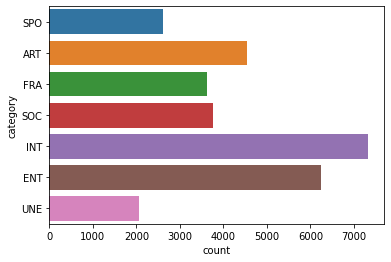

In [2]:
import pandas as pd
from google.colab import drive
import seaborn as sns

drive.mount('/content/gdrive') 
# load dataframe from CSV file
data = pd.read_csv("/content/gdrive/My Drive/Text_analysis_and_information_retrieval/LeMonde2003_9classes.csv.gz")
print(data.head(5), '\n')
print("Number of artiles:", data.shape[0])
print("Number of differents types of articles:", data['category'].nunique())
size_category=data['category'].value_counts()
print("Types repartition:\n",size_category)

# Plot the statistics of category
sns.countplot(data=data, y='category')

In [3]:
# Print examples of the articles
pd.set_option('display.max_colwidth', -1)
data.sample(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


text category
26170  le président du mouvement des entreprises de france medef ernest-antoine seillière ne versera pas d'huile sur le feu en se livrant à quelque commentaire que ce soit sur la situation sociale nous nous attendions à une certaine crispation nous n'en rajouterons pas nous souhaitons voir adopté le plan fillon et nous sommes conscients de la complexité de la tâche du gouvernement plaidait-on lundi 2 juin dans l'entourage de m. seillière officiellement le medef a dit tout ce qu'il avait à dire sur la réforme en général et sur le plan fillon en particulier l'édition 2003 du traditionnel cartes sur table n'a laissé aucun doute sur les attentes de la première organisation patronale française sans réforme la france décline sans réforme les entreprises perdent du terrain fait valoir le rapport de conjoncture économique et sociale du medef fort de cette conviction réaffirmée jeudi 22 mai le numéro un du patronat qui s'était fait l'écho à la fin du mois d'août de la très grande impatience des chefs d'entreprise a choisi cette fois-ci d'adopter un profil bas des pouvoirs publics il attend de la fermeté mais se refuse à le redire nous savons qu'une partie de l'opinion voit dans le plan fillon un projet du medef nous n'avons aucun intérêt à intervenir sur la scène publique à un moment où le gouvernement tout en se débattant dans une situation difficile a commencé à nous envoyer des signaux positifs en particulier sur la maîtrise de la dépense publique ajoute-t-on de même source mais si la retenue est de mise au plus haut niveau sur le terrain les organisations territoriales du medef font état du ras-le-bol et de la lassitude de chefs d'entreprise inquiets de la répétition des grèves dans un contexte économique défavorable cet état d'esprit général est très marqué dans des départements comme les bouches-du-rhône où la mobilisation ne faiblit guère blocus mental pourvu qu'ils tiennent résume de son côté l'union des industries et métiers de la métallurgie uimm dans sa lettre actualités du 21 mai pourvu qu'ils tiennent c'est en peu de mots ce que la société civile a envie de dire à ceux qui nous gouvernent cette société civile qui imagine invente produit et fabrique une richesse qui profite à tous et nous fait vivre tous cette société civile qui regarde ahurie notre république assiégée de l'intérieur par ses propres serviteurs rétifs à la moindre réforme poursuit l'éditorial patronal en invitant le gouvernement à forcer un blocus mental et à tenir bon sur une réforme indispensable  FRA    
21819  le conseil de sécurité est d'accord pour dédoubler la charge de procureur du tribunal pénal international pour le rwanda tpir de celle de procureur du tribunal pénal international pour l'ex-yougoslavie tpi selon les déclarations lundi 11 août de diplomates à l'onu les etats-unis déposeront dans le courant de la semaine un projet de résolution en ce sens qui devrait être adopté sans difficulté afp                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

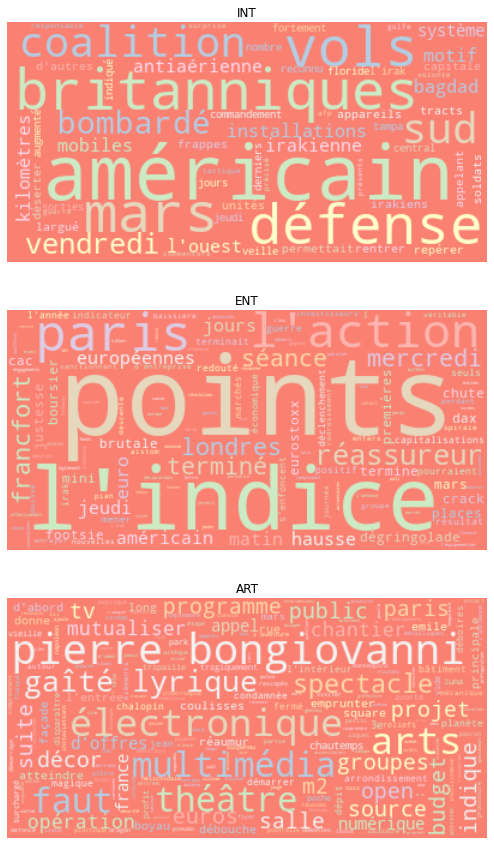

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

french_stop_words = []
with open('/content/gdrive/My Drive/Text_analysis_and_information_retrieval/text_classification_data_stop_word_fr.txt') as f:
    txt = f.read() 
stop_words_fr = set(txt.split('\n'))

# Display one wordcloud for the 3 most frequent classes (INT,ENT,ART)
most_frequent_classes = ['INT', 'ENT', 'ART']

plt.figure(figsize=(15, 15))
for i, classe in enumerate(most_frequent_classes):
    text = ' '.join(data.loc[data['category']==classe]['text'].iloc[j] for j in range(size_category[classe]))
    plt.subplot(3, 1, i+1)
    plt.title(classe)
    wordcloud = WordCloud(background_color='salmon', colormap='Pastel1',stopwords=stop_words_fr).generate(data.loc[data['category']==classe]['text'].iloc[i])
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
plt.show()


## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple : 

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 1000  words : 

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=1000)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:

> * Split the dataset LeMonde2003 into train set (60%), dev set (20%)  and test set (20%) using scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> * For each set, transform the text of the articles into vectors using the `CountVectorizer`, considering the 2000 most frequent words. 
> * train a naive bayes classifier on the data. Evaluate the classification accuracy on the train, dev and test sets.

> ***Important*** : the test set must not be used during the training phase, and learning the vector representation of the words is part of the training. The dev set should be an evaluation of the test set.



In [13]:
from sklearn.model_selection import train_test_split
# Split the dataset, create X (features) and y (target), print the size

nb_articles = data.shape[0]
X = [data['text'].iloc[j] for j in range(nb_articles)]
y = [data['category'].iloc[j] for j in range(nb_articles)]

X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=len(X_dev)/len(X_train),shuffle=True)

print( "Train size :",len(X_train))
print( "Dev size :",len(X_dev))
print( "Test size :",len(X_test))

Train size : 18099
Dev size : 6033
Test size : 6033


###First try with a vector which element correspond to 1 word:

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors
vectorizer = CountVectorizer(max_features=2000)
vectorizer.fit(X_train)

X_train_counts = vectorizer.transform(X_train)
X_dev_counts = vectorizer.transform(X_dev)
X_test_counts = vectorizer.transform(X_test)

In [50]:
print(vectorizer.get_feature_names())

['000', '01', '10', '100', '11', '12', '13', '14', '15', '150', '16', '17', '18', '19', '1970', '1980', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '1er', '20', '200', '2000', '2001', '2002', '2003', '2004', '2005', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '300', '31', '32', '33', '34', '35', '37', '38', '40', '400', '42', '44', '45', '48', '50', '500', '55', '60', '600', '65', '70', '75', '80', '800', '90', 'abord', 'absence', 'accepter', 'accepté', 'accord', 'accords', 'accueil', 'accusé', 'accès', 'achat', 'acquis', 'acte', 'actes', 'acteur', 'acteurs', 'actifs', 'action', 'actionnaires', 'actions', 'activité', 'activités', 'actuel', 'actuelle', 'actuellement', 'adjoint', 'administration', 'adopté', 'affaire', 'affaires', 'affiche', 'affirme', 'affirmé', 'afghanistan', 'afin', 'afp', 'afrique', 'agence', 'agents', 'agir', 'agit', 'agricole', 'ai', 'aide', 'aider', 'aides', 'ailleurs', 'aime', 'ainsi', 'air', 'ait', 'ajou

In [51]:
from sklearn.metrics import accuracy_score
# train a Naive Bayes classifier
from sklearn.naive_bayes  import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_counts, y_train)

y_pred = nb.predict(X_train_counts)
print('Training Accuracy : ', accuracy_score(y_train, y_pred, normalize=True, sample_weight=None)*100,'%')
y_pred = nb.predict(X_dev_counts)
print('Dev Accuracy : ', accuracy_score(y_dev, y_pred, normalize=True, sample_weight=None)*100,'%')
y_pred = nb.predict(X_test_counts)
print('Test Accuracy : ', accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)*100,'%')

Training Accuracy :  76.15890380684016 %
Dev Accuracy :  74.95441737112549 %
Test Accuracy :  75.26935189789491 %


###Second try with a vector which element correspond to 2 words:

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors
vectorizer = CountVectorizer(max_features=2000, ngram_range=(2,2))
vectorizer.fit(X_train)

X_train_counts = vectorizer.transform(X_train)
X_dev_counts = vectorizer.transform(X_dev)
X_test_counts = vectorizer.transform(X_test)

In [45]:
print(vectorizer.get_feature_names())

['000 euros', '000 personnes', '10 000', '100 000', '11 septembre', '1er janvier', '2002 et', '2002 la', '2002 le', 'absence de', 'accord avec', 'accord de', 'affaires de', 'affaires sociales', 'affaires étrangères', 'afin de', 'agit de', 'ai pas', 'ainsi qu', 'ainsi que', 'air france', 'ajoute il', 'al qaida', 'alain juppé', 'alors qu', 'alors que', 'américains et', 'américains ont', 'ancien ministre', 'ancien président', 'années 1970', 'années 1980', 'années 1990', 'années de', 'ans après', 'ans de', 'ans en', 'ans est', 'ans et', 'ans il', 'ans la', 'ans le', 'ans plus', 'ans pour', 'appel de', 'après avoir', 'après la', 'après le', 'après les', 'après midi', 'après un', 'après une', 'armes de', 'armée américaine', 'assemblée générale', 'assemblée nationale', 'assurance maladie', 'au bout', 'au centre', 'au coeur', 'au conseil', 'au contraire', 'au cours', 'au delà', 'au dessus', 'au début', 'au fil', 'au gouvernement', 'au lendemain', 'au lieu', 'au milieu', 'au ministère', 'au moi

In [46]:
from sklearn.metrics import accuracy_score
# train a Naive Bayes classifier
from sklearn.naive_bayes  import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_counts, y_train)

y_pred = nb.predict(X_train_counts)
print('Training Accuracy : ', accuracy_score(y_train, y_pred, normalize=True, sample_weight=None)*100,'%')
y_pred = nb.predict(X_dev_counts)
print('Dev Accuracy : ', accuracy_score(y_dev, y_pred, normalize=True, sample_weight=None)*100,'%')
y_pred = nb.predict(X_test_counts)
print('Test Accuracy : ', accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)*100,'%')

Training Accuracy :  73.2029393889165 %
Dev Accuracy :  70.49560749212664 %
Test Accuracy :  70.76081551466932 %


###Not too good, maybe with 3 words??
###We notice that the precision is better when we increase the max_feature value. 

## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer().fit(X_train_counts)
 	X_train_tf = tf_transformer.transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)
	
**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.

In [58]:
from sklearn.feature_extraction.text import TfidfTransformer

tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_dev_tf = tf_transformer.transform(X_dev_counts)
X_test_tf = tf_transformer.transform(X_test_counts)

multi_nb = MultinomialNB()
multi_nb.fit(X_train_tf, y_train)

y_pred = multi_nb.predict(X_train_tf)
print('Training Accuracy : ', accuracy_score(y_train, y_pred, normalize=True, sample_weight=None)*100,'%')
y_pred = multi_nb.predict(X_dev_tf)
print('Dev Accuracy : ', accuracy_score(y_dev, y_pred, normalize=True, sample_weight=None)*100,'%')
y_pred = multi_nb.predict(X_test_tf)
print('Test Accuracy : ', accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)*100,'%')

Training Accuracy :  78.09823747168352 %
Dev Accuracy :  76.91032653737776 %
Test Accuracy :  76.89375103596883 %


###With this method you get a better accuracy on predictions. This accuracy is again worse when you choose 2 words in the vectorizer. We also notice that when we increase the value of max_features, the results are better (we can easily approach 80% of prediction with 5000/6000. 

## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used : 

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes. It can be displayed in color with [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?


In [78]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ART       0.78      0.89      0.83       912
         ENT       0.80      0.87      0.83      1258
         FRA       0.68      0.71      0.69       731
         INT       0.78      0.89      0.83      1466
         SOC       0.68      0.66      0.67       739
         SPO       0.92      0.79      0.85       531
         UNE       0.33      0.00      0.01       396

    accuracy                           0.77      6033
   macro avg       0.71      0.69      0.67      6033
weighted avg       0.74      0.77      0.74      6033



###L'analyse que l'on peut faire de ces précisions est la suivante:
> La classe la moins bien classifiée est UNE: qui correspond on le rappelle à l'article qui se situe à la une d'un journal: cela paraît logique que cette classe soit plus difficile à classifier (le vocabulaire de l'article ne détermine pas le fait qu'il soit mis en avant ou non par le journal, on regarde plutôt l'importance de cette article)

> La classe qui obtient la meilleure précision est SPO qui correspond à sport: ce qui paraît une nouvelle fois cohérent: le champ lexical du sport est en général uniquement utilisé dans les articles de sport.

> Ce sont les catégories ART et INT qui ont les meilleurs valeurs de recall (0.89), ce qui signifie que ce sont sur ces deux classes que notre algorithme est le "meilleur": il a une bonne capacité à trouver les bons exemples sans se tromper.




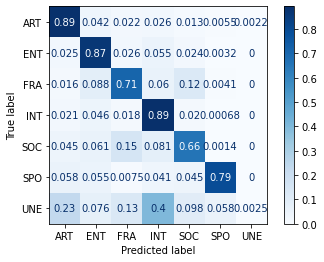

In [84]:
plot_confusion_matrix(multi_nb, X_test_tf, y_test, cmap=plt.cm.Blues, normalize='true') 

###En analysant cette matrice de confusion nous pouvons dire plusieurs choses:
>Comme nous l'avons vu précédemment et pour les mêmes raisons, la classe la plus confuse est la classe UNE (0.4, 0.23).
> Nou pouvons aussi voir que l'algorithme a du mal à faire la différence entre la catégorie France et la catégorie Société (0.15 et 0.12), ce qui ne paraît pas très étrange si on garde le fait que l'article peut parler de société française et donc employer le même vocabulaire pour ces deux catégories.  

## Hyperparameter optimization

The classification process has many parameters : alpha for the classifier, max_features, max_df, min_df, using idf or not, ngram orders for the Count of TfIDF transformer. These parameters can be optimized by a grid search using GridSearchCV.

**Question**:

> * Using the template code below, find the best values for the parameter alpha,  max_features, max_df, min_df, use_idf, ngram_range

Note that for developping the code, the number of training samples is limited to 1000

```
grid_search.fit(X_train_dev[:1000], y_train_dev[:1000])
```

Once your code is correct, you can train on the full training set.


In [96]:
# Hyperameters optimization with GridSearchCV = parallel processing
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from pprint import pprint
from time import time
import logging
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')


pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

print("This is the avaible editable parameters:", pipeline.get_params().keys())

parameters = {
    'vect__max_df':[0.5, 0.75, 1.0],
    'clf__alpha':[1.0,0.8,0.2],
    'vect__max_features':[2000,5000,10000],
    'vect__max_df':[0.6,0.9,1],
    'vect__min_df':[0,0.1,0.3],
    'tfidf__use_idf':[True,False],
    'vect__ngram_range':[(1,1),(2,2),(4,4)]
}
if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=2, cv=3)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(X_dev[:1000], y_dev[:1000])
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

dict_keys(['memory', 'steps', 'verbose', 'vect', 'tfidf', 'clf', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'clf__alpha', 'clf__class_prior', 'clf__fit_prior'])
Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__alpha': [1.0, 0.8, 0.2],
 'tfidf__use_idf': [True, False],
 'vect__max_df': [0.6, 0.9, 1],
 'vect__max_features': [2000, 5000, 10000],
 'vect__min_df': [0, 0.1, 0.3],
 'vect__ngram_range': [(1, 1), (2, 2), (4, 4)]}
Fitting 3 folds for each of 486 candidates, totalling 1458 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 1458 out of 1458 | elapsed: 16.5min finished


done in 992.821s

Best score: 0.722
Best parameters set:
	clf__alpha: 0.2
	tfidf__use_idf: True
	vect__max_df: 0.6
	vect__max_features: 2000
	vect__min_df: 0
	vect__ngram_range: (1, 1)


## Classification with Neural networks

Neural networks can be trained to learn both the vector representation of the words (instead of tf-idf) and how to classify the documents. The code below allows you to train a neural text classifier using word embeddings using Keras. Most of the code is written, you only have to define the architecture of the network with the correct parameters before training it : 

**Question**:

> * Define a neural network in the function `get_model()` with the following parameters : 
>  * use only the 10 000 most frequent words in the documents
>  * use 1024 as the maximal number of words in the articles
>  * use an embedding size of 300:  [embedding layer](https://keras.io/layers/embeddings/)
>  * use a dropout of 0.5:  [dropout layer](https://keras.io/layers/core/#dropout)
>  * use 32 convolutional filters of size 2 x EMBED_SIZE: [1D convolutional layer](https://keras.io/layers/convolutional/#conv1d)
>  * use a max pooling of size 2 : [1D Max Pooling](https://keras.io/layers/pooling/#maxpooling1d)
> * Train the model and compare its accuracy to the Naive Bayes models.



In [ ]:
import ast
import os
from nn_utils import TrainingHistory
from keras.layers import Dense, Embedding, Input
from keras.layers import GRU, Dropout, MaxPooling1D, Conv1D, Flatten
from keras.models import Model
import numpy as np
import itertools
from keras.utils import np_utils
from sklearn.metrics import (classification_report, 
                             precision_recall_fscore_support, 
                             accuracy_score)

from keras.preprocessing import text, sequence



In [ ]:
# Model parameters
MAX_FEATURES = # YOUR CODE HERE
MAX_TEXT_LENGTH = # YOUR CODE HERE
EMBED_SIZE  = # YOUR CODE HERE
BATCH_SIZE = 16
EPOCHS = 10
VALIDATION_SPLIT = 0.1

In [ ]:
def get_train_test(train_raw_text, test_raw_text):
    
    tokenizer = text.Tokenizer(num_words=MAX_FEATURES)

    tokenizer.fit_on_texts(list(train_raw_text))
    train_tokenized = tokenizer.texts_to_sequences(train_raw_text)
    test_tokenized = tokenizer.texts_to_sequences(test_raw_text)
    return sequence.pad_sequences(train_tokenized, maxlen=MAX_TEXT_LENGTH), \
           sequence.pad_sequences(test_tokenized, maxlen=MAX_TEXT_LENGTH)



def get_model():

    inp = Input(shape=(# YOUR CODE HERE,))
    model = Embedding(# YOUR CODE HERE, # YOUR CODE HERE)(inp)
    model = Dropout(# YOUR CODE HERE)(model)
    model = Conv1D(filters=# YOUR CODE HERE, kernel_size=# YOUR CODE HERE, padding='same', activation='relu')(model)
    model = MaxPooling1D(pool_size=# YOUR CODE HERE)(model)
    model = Flatten()(model)
    model = Dense(7, activation="softmax")(model)
    model = Model(inputs=inp, outputs=model)
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model


def train_fit_predict(model, x_train, x_test, y, history):
    
    model.fit(x_train, y,
              batch_size=BATCH_SIZE,
              epochs=EPOCHS, verbose=1,
              validation_split=VALIDATION_SPLIT)

    return model.predict(x_test)


# Get the list of different classes
CLASSES_LIST = np.unique(y_train)
n_out = len(CLASSES_LIST)
print(CLASSES_LIST)

# Convert clas string to index
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(CLASSES_LIST)
y_train = le.transform(y_train) 
y_test = le.transform(y_test) 
train_y_cat = np_utils.to_categorical(y_train, n_out)

# get the textual data in the correct format for NN
x_vec_train, x_vec_test = get_train_test(X_train, X_test)
print(len(x_vec_train), len(x_vec_test))

# define the NN topology
model = get_model()

# Define training procedure
history = TrainingHistory(x_vec_test, y_test, CLASSES_LIST)

# Train and predict
y_predicted = train_fit_predict(model, x_vec_train, x_vec_test, train_y_cat, history).argmax(1)


print("Test Accuracy:", accuracy_score(y_test, y_predicted))

p, r, f1, s = precision_recall_fscore_support(y_test, y_predicted, 
                                              average='micro',
                                              labels=[x for x in np.unique(y_train) ])

print('p r f1 %.1f %.2f %.3f' % (np.average(p, weights=s)*100.0, 
                                 np.average(r, weights=s)*100.0, 
                                 np.average(f1, weights=s)*100.0))


print(classification_report(y_test, y_predicted, labels=[x for x in np.unique(y_train)]))